# Quantum Machine Learning (QML)

🎯 **Objetivo deste Notebook:** Entender como usar computação quântica para Machine Learning através de exemplos práticos e visuais.

Bem-vindo ao mundo da **IA Quântica (Quantum Machine Learning - QML)**!

Se você já tem experiência com programação e IA clássica, este notebook vai mostrar como aplicar conceitos familiares (como redes neurais e classificadores) em computadores quânticos. Vamos usar a biblioteca **Qiskit Machine Learning** da IBM, que tem uma sintaxe muito similar ao scikit-learn que você já conhece.

**O que você vai aprender:**
- ✅ Como funciona um Classificador Variacional Quântico (VQC)
- ✅ A diferença entre Feature Map e Ansatz
- ✅ Como visualizar circuitos quânticos e fronteiras de decisão
- ✅ Quando QML tem vantagens sobre ML clássico
- ✅ Comparações práticas com classificadores tradicionais

**Pré-requisitos:**
- Conhecimento básico de Python
- Familiaridade com conceitos de ML (classificação, acurácia, etc.)
- Ter completado os notebooks anteriores sobre portas quânticas (opcional, mas recomendado)

Vamos começar! 🚀


### 1. A Estrutura: O "Sanduíche" Quântico

Numa rede neural clássica, você tem: *Input Layer --> Hidden Layers --> Output Layer*.
No modelo quântico, temos uma estrutura parecida, mas com nomes diferentes. Vamos chamar de **Sanduíche Quântico**:

1. **Pão de Baixo (Codificação de Dados / Feature Map):**
   * *Clássico:* Seus dados ($x$) são números num vetor.
   * *Quântico:* Precisamos transformar esses números em estados quânticos. Fazemos isso girando os qubits. Se  $x=0.5$, giramos o qubit em 0.5 radianos. Isso chama-se **Feature Map**.
   * *O Pulo do Gato:* Isso joga os dados num espaço multidimensional gigante (Hilbert Space), facilitando a separação de classes que estão misturadas.


2. **O Recheio (Ansatz / Modelo Treinável):**
   * *Clássico:* Pesos ($w$) e Vieses ($b$) que multiplicam a entrada.
   * *Quântico:* Portas lógicas com parâmetros ajustáveis (rotações $\theta$). É aqui que a IA "aprende". O otimizador vai girar esses botões até que a saída seja correta. Chamamos esse circuito de **Ansatz**.


3. **Pão de Cima (Medição / Saída):**
   * *Clássico:* Função Softmax ou Sigmoid que dá a probabilidade.
   * *Quântico:* Medimos os qubits. A frequência de '0's ou '1's nos dá a probabilidade da classe.

---



### 2. Mão na Massa: O Código

Vamos usar o `qiskit-machine-learning`. Esta biblioteca é fantástica porque ela imita a sintaxe do **Scikit-Learn**. Se você sabe dar `.fit()` e `.predict()`, você sabe usar IA quântica.

Vamos começar com um problema de classificação binária usando apenas 2 qubits. **Primeiro** usaremos dados linearmente separáveis para entender o básico, e **depois** testaremos com dados circulares não-lineares (onde o QML realmente brilha!).



#### Passo 0: Instalação

Você precisará instalar o pacote de ML e o algoritmo de otimização:

```bash
pip install qiskit-machine-learning qiskit-algorithms scikit-learn

```



#### Passo 1: O Script (Comentado passo a passo)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Qiskit Imports
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms import VQC
from qiskit_aer import AerSimulator


#### ⚠️ Nota sobre Versões do Qiskit

**Importante:** Este notebook usa classes que são consideradas deprecated nas versões mais recentes do Qiskit (2.1+). O código funciona perfeitamente, mas esteja ciente de que em versões futuras (Qiskit 3.0+), você pode precisar usar:

```python
# Ao invés de:
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

# Use (Qiskit 3.0+):
from qiskit.circuit.library import zz_feature_map, real_amplitudes
```

Para este notebook educacional, continuaremos usando a sintaxe atual por ser mais amplamente compatível e documentada. A lógica e conceitos permanecem os mesmos!

In [2]:

# --- 1. PREPARAÇÃO DOS DADOS (O mundo clássico) ---
# Vamos criar um dataset sintético simples (2 classes, 2 features para caber em 2 qubits)
X, y = make_classification(         # Função do scikit-learn para criar datasets sintéticos
    n_samples=200,                  # Número de amostras
    n_features=2,                   # Número de features ou características. Por exemplo, altura e peso
    n_redundant=0,                  # Features redundantes (não usadas)
    n_informative=2,                # Features informativas, isto é, que ajudam a distinguir as classes
    n_clusters_per_class=1,         # Número de clusters por classe
    class_sep=2.0,                  # Dados bem separados para facilitar o primeiro exemplo
    random_state=42                 # Random seed para reprodutibilidade
)

# Normalização é CRUCIAL em QML.
# As portas de rotação esperam valores entre 0 e 2pi (ou -1 e 1).
# Se passar o valor "300", o qubit vai girar loucamente e perder sentido.
scaler = MinMaxScaler(feature_range=(0, np.pi)) # Escalando entre 0 e pi. Ele gera 
X = scaler.fit_transform(X)

# Divisão treino/teste padrão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Visualizando os vetores de dados em modo texto
print("Primeiras 5 amostras do conjunto de treino:")
for i in range(5):
    print(f"Amostra {i+1}: Features = {X_train[i]}, Classe = {y_train[i]}")


Primeiras 5 amostras do conjunto de treino:
Amostra 1: Features = [2.32325348 1.74815771], Classe = 1
Amostra 2: Features = [1.92946371 1.38973427], Classe = 1
Amostra 3: Features = [2.5351124  1.67814764], Classe = 1
Amostra 4: Features = [2.63887591 1.67211895], Classe = 1
Amostra 5: Features = [1.07994911 2.02835397], Classe = 0


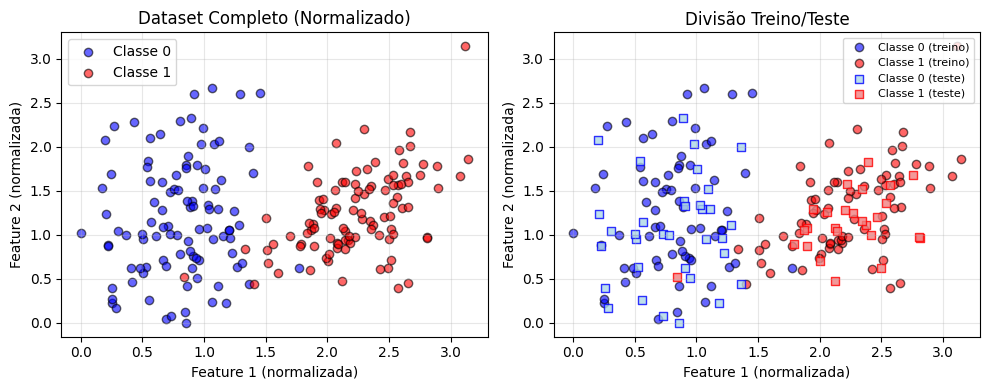

Total de amostras: 200
Amostras de treino: 140 (70.0%)
Amostras de teste: 60 (30.0%)
Distribuição de classes: Classe 0: 100, Classe 1: 100


In [4]:
# --- VISUALIZAÇÃO DOS DADOS ---
# Vamos ver como são os dados que vamos classificar
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Classe 0', alpha=0.6, edgecolors='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Classe 1', alpha=0.6, edgecolors='k')
plt.xlabel('Feature 1 (normalizada)')
plt.ylabel('Feature 2 (normalizada)')
plt.title('Dataset Completo (Normalizado)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', label='Classe 0 (treino)', alpha=0.6, edgecolors='k', marker='o')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='red', label='Classe 1 (treino)', alpha=0.6, edgecolors='k', marker='o')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='lightblue', label='Classe 0 (teste)', alpha=0.8, edgecolors='blue', marker='s')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='lightcoral', label='Classe 1 (teste)', alpha=0.8, edgecolors='red', marker='s')
plt.xlabel('Feature 1 (normalizada)')
plt.ylabel('Feature 2 (normalizada)')
plt.title('Divisão Treino/Teste')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Total de amostras: {len(X)}")
print(f"Amostras de treino: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Amostras de teste: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"Distribuição de classes: Classe 0: {sum(y==0)}, Classe 1: {sum(y==1)}")

### 2.1 O Feature Map: A Ponte Entre os Mundos Clássico e Quântico

#### 🌉 O que é um Feature Map?

Em Machine Learning clássico, seus dados são simplesmente números em um vetor (por exemplo, `[1.2, 3.4]`). Mas um computador quântico não entende números diretamente - ele trabalha com **estados quânticos** (superposições e emaranhamentos de qubits).

O **Feature Map** é a função que realiza essa tradução:

```
Dados Clássicos (x₁, x₂, ..., xₙ)  →  |ψ(x)⟩ Estado Quântico
```

**Analogia:** Pense no Feature Map como um "tradutor universal". Se você quer comunicar com alienígenas (qubits), precisa converter seu idioma (números) para o idioma deles (estados quânticos).

---

#### 🔬 Por que precisamos disso?

1. **Interface de Comunicação:** Qubits não "leem" números diretamente. Eles existem em superposições de |0⟩ e |1⟩
2. **Projeção em Alta Dimensão:** Um Feature Map quântico projeta seus dados n-dimensionais em um espaço de **2ⁿ dimensões** (o espaço de Hilbert). Isso é exponencialmente maior!
3. **Separação Não-Linear:** Problemas que são difíceis de separar no espaço original podem se tornar triviais no espaço quântico de alta dimensão

---

#### ⚡ O ZZFeatureMap Especificamente

O `ZZFeatureMap` é um dos Feature Maps mais populares em QML. O nome vem das **portas ZZ** (interações entre qubits usando operador Pauli-Z).

**Estrutura do ZZFeatureMap:**

1. **Camada de Hadamard (H):**
   ```
   H|0⟩ → (|0⟩ + |1⟩)/√2
   ```
   Coloca todos os qubits em superposição uniforme (ponto de partida neutro)

2. **Codificação Individual (Rotações RZ):**
   ```
   RZ(xᵢ)|ψ⟩
   ```
   Cada feature `xᵢ` dos seus dados gira o qubit correspondente em torno do eixo Z por `xᵢ` radianos

3. **Interações ZZ (Emaranhamento):**
   ```
   ZZ(xᵢ · xⱼ) = exp(-i · xᵢ · xⱼ · Z ⊗ Z)
   ```
   Cria correlações não-lineares entre diferentes features através do **produto** `xᵢ · xⱼ`

4. **Repetições (reps):**
   Todo o processo (H + RZ + ZZ) pode ser repetido múltiplas vezes para aumentar a expressividade

---

#### 🎯 Exemplo Concreto

Suponha que você tem dados `x = [0.5, 1.2]` (2 features) e quer usar um ZZFeatureMap com 2 qubits:

```
Estado Inicial: |00⟩

1. Aplicar Hadamard:
   H⊗H|00⟩ → (|00⟩ + |01⟩ + |10⟩ + |11⟩)/2

2. Codificar Feature 1 (x₁ = 0.5):
   RZ(0.5) no qubit 0

3. Codificar Feature 2 (x₂ = 1.2):
   RZ(1.2) no qubit 1

4. Criar Interação ZZ:
   ZZ(0.5 × 1.2 = 0.6) entre qubits 0 e 1
   Isso emaranha os qubits proporcionalmente ao produto das features!

5. (Opcional) Repetir para reps > 1
```

O estado final `|ψ(x)⟩` agora codifica seus dados em um espaço de **2² = 4 dimensões**.

---

#### 💡 Por que o produto xᵢ · xⱼ é importante?

A interação **ZZ** usa o **produto** das features, não a soma. Isso cria **termos não-lineares** que são cruciais para:

- Capturar correlações entre variáveis (por exemplo, "altura × peso")
- Resolver problemas que não são linearmente separáveis
- Implementar um kernel quântico de alta expressividade

**Comparação:**
- **Feature Map Linear:** φ(x) = [x₁, x₂] → 2D
- **Kernel Polinomial (clássico):** φ(x) = [x₁, x₂, x₁², x₂², x₁·x₂] → 5D
- **ZZFeatureMap (quântico):** φ(x) = |ψ(x)⟩ → 2ⁿ dimensional (exponencial!)

---

#### 🔢 Parâmetros Importantes

Quando criamos `ZZFeatureMap(feature_dimension=2, reps=1)`:

- `feature_dimension=2`: Número de features de entrada (determina número de qubits)
- `reps=1`: Quantas vezes repetir a sequência H → RZ → ZZ
  - `reps=1`: Circuito raso, rápido, menos expressivo
  - `reps=2`: Mais profundo, mais expressivo, mas mais lento
  - `reps≥3`: Máxima expressividade, mas risco de overfitting e lentidão

---

#### 🌟 Vantagens do ZZFeatureMap

✅ **Emaranhamento Nativo:** Cria correlações quânticas automaticamente  
✅ **Não-Linearidade:** Termos xᵢ·xⱼ sem custo computacional extra  
✅ **Escalável:** Funciona bem para 2-10 qubits (na era NISQ atual)  
✅ **Compatível:** Amplamente suportado em Qiskit e hardware IBM  

---

#### ⚠️ Limitações e Considerações

- **Normalização Crítica:** Features devem estar em [0, π] ou [-π, π], caso contrário as rotações perdem significado
- **Ruído:** Circuitos profundos (reps alto) acumulam mais ruído em hardware real
- **Barren Plateaus:** Em circuitos muito profundos, gradientes podem "desaparecer", dificultando treinamento

---

#### 📊 Alternativas ao ZZFeatureMap

Outros Feature Maps populares:

| Feature Map | Características |
|------------|----------------|
| **PauliFeatureMap** | Usa rotações X, Y, Z (mais geral) |
| **StatePreparation** | Codifica amplitudes diretamente (custoso) |
| **Custom Feature Map** | Você desenha o circuito (máxima flexibilidade) |

O **ZZFeatureMap** é um ótimo ponto de partida: equilibra expressividade e eficiência!

---

#### 🔍 Visualização Mental

```
┌─────────────────────────────────────────┐
│  MUNDO CLÁSSICO                         │
│  Dados: x = [0.5, 1.2]                  │
│         (2 dimensões)                   │
└──────────────┬──────────────────────────┘
               │
               │ ZZFeatureMap
               │ (Tradução)
               ▼
┌─────────────────────────────────────────┐
│  MUNDO QUÂNTICO                         │
│  Estado: |ψ(x)⟩ = α₀₀|00⟩ + α₀₁|01⟩   │
│                + α₁₀|10⟩ + α₁₁|11⟩    │
│         (4 dimensões complexas!)       │
│  Com emaranhamento e correlações!      │
└─────────────────────────────────────────┘
```

**Resumo:** O Feature Map é a "rampa de acesso" ao mundo quântico, e o ZZFeatureMap faz isso de forma eficiente usando emaranhamento ZZ para capturar interações não-lineares entre suas features!

In [5]:

# --- 2. O FEATURE MAP (Tradutor Dados -> Quantum) ---
# ZZFeatureMap é famoso por criar emaranhamento entre os dados,
# ajudando a resolver problemas não-lineares.
num_qubits = 2
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1)


C:\Users\Max\AppData\Local\Temp\ipykernel_20596\1784461025.py:5: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1)


#### Visualizando o Feature Map

O **Feature Map** é a "ponte" entre o mundo clássico e o quântico. Vamos visualizar o circuito:

Feature Map - Circuito de Codificação dos Dados
Número de qubits: 2
Número de repetições: 1
Dimensão das features: 2

Exemplo de dados de entrada: [2.32325348 1.74815771]
  Feature 1: 2.3233 radianos
  Feature 2: 1.7482 radianos

Circuito com parâmetros atribuídos:


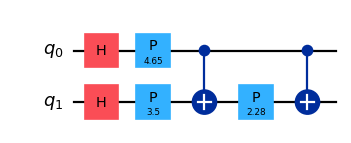

In [6]:
# Visualizar o Feature Map com dados reais
print("Feature Map - Circuito de Codificação dos Dados")
print("=" * 60)
print(f"Número de qubits: {num_qubits}")
print(f"Número de repetições: {feature_map.reps}")
print(f"Dimensão das features: {feature_map.feature_dimension}")
print()

# Criar uma instância do feature map com dados de exemplo
sample_data = X_train[0]  # Pegar a primeira amostra
print(f"Exemplo de dados de entrada: {sample_data}")
print(f"  Feature 1: {sample_data[0]:.4f} radianos")
print(f"  Feature 2: {sample_data[1]:.4f} radianos")
print()

# Bind dos parâmetros com dados reais
feature_map_bound = feature_map.assign_parameters(sample_data)
print("Circuito com parâmetros atribuídos:")
display(feature_map_bound.decompose().draw(output='mpl', idle_wires=False, scale=0.8))

### 2.2 O Ansatz: O "Cérebro" Treinável do Circuito Quântico

#### 🧠 O que é um Ansatz?

Enquanto o **Feature Map** codifica os dados de entrada, o **Ansatz** é onde o "aprendizado" acontece. É o circuito quântico parametrizado cujos ângulos de rotação (θ) são ajustados durante o treinamento.

**Analogia com Redes Neurais Clássicas:**

```
Rede Neural Clássica:
Input → [W₁, b₁] → Hidden Layer → [W₂, b₂] → Output
         ↑ pesos treináveis ↑

VQC Quântico:
|ψ(x)⟩ → [θ₁, θ₂, θ₃, ...] → Ansatz → Medição
          ↑ ângulos treináveis ↑
```

O **Ansatz** é literalmente a "rede neural quântica" - um template de circuito com parâmetros que serão otimizados para minimizar o erro de classificação.

---

#### 🎯 O Nome "Ansatz"

**Etimologia:** Do alemão *Ansatz* = "abordagem inicial" ou "proposta"

Em física e matemática, um *ansatz* é uma suposição educada sobre a forma da solução de um problema. No QML:
- Você **propõe** uma estrutura de circuito (RY rotations + CX gates)
- O otimizador **ajusta** os parâmetros θ para encontrar a melhor solução
- É uma "tentativa estruturada" de encontrar o circuito ideal

---

#### ⚡ O RealAmplitudes Especificamente

O `RealAmplitudes` é um dos ansatz mais populares e eficientes em QML. O nome vem do fato de que ele manipula apenas **amplitudes reais** (não usa números complexos de fase arbitrária).

**Estrutura do RealAmplitudes:**

1. **Camada de Rotação (RY gates):**
   ```
   RY(θᵢ)|ψ⟩ = cos(θᵢ/2)|0⟩ + sin(θᵢ/2)|1⟩
   ```
   Cada qubit recebe uma rotação RY com ângulo θ treinável. A porta RY gira o qubit no plano Y-Z da esfera de Bloch.

2. **Camada de Emaranhamento (CX gates):**
   ```
   CX|control⟩|target⟩
   ```
   Portas CNOT conectam qubits vizinhos, criando emaranhamento (correlações quânticas entre qubits)

3. **Repetições (reps):**
   As camadas RY → CX podem ser repetidas múltiplas vezes, criando um circuito mais profundo e expressivo

**Padrão típico para 2 qubits, reps=2:**
```
q[0]: ─RY(θ₀)─●───RY(θ₂)─●───
              │           │
q[1]: ─RY(θ₁)─X───RY(θ₃)─X───
```

---

#### 🔬 Exemplo Detalhado: RealAmplitudes(num_qubits=2, reps=1)

**Estrutura:**
1. **Primeira camada de rotação:**
   - `RY(θ₀)` no qubit 0
   - `RY(θ₁)` no qubit 1
   
2. **Camada de emaranhamento:**
   - `CX(qubit 0 → qubit 1)` - qubit 0 controla qubit 1

3. **Segunda camada de rotação:**
   - `RY(θ₂)` no qubit 0
   - `RY(θ₃)` no qubit 1

**Total:** 4 parâmetros treináveis (θ₀, θ₁, θ₂, θ₃)

**Durante o treinamento:**
- O otimizador testa diferentes combinações de ângulos
- Por exemplo: θ = [0.5, 1.2, 0.8, 2.1]
- Avalia o erro de classificação
- Ajusta os ângulos para reduzir o erro
- Repete até convergir!

---

#### 💡 Por que Rotações RY?

A porta **RY** foi escolhida porque:

1. **Amplitudes Reais:** RY(θ)|0⟩ = cos(θ/2)|0⟩ + sin(θ/2)|1⟩
   - Os coeficientes são reais (não complexos)
   - Simplifica cálculos e otimização
   
2. **Cobertura Completa:** Com RY + emaranhamento, você pode alcançar qualquer estado quântico necessário

3. **Eficiência:** Menos portas = menos ruído em hardware real

4. **Expressividade:** Mesmo sendo simples, é surpreendentemente poderoso para ML

**Comparação com outras rotações:**
- **RZ(θ):** Adiciona apenas fase (não muda probabilidades diretamente)
- **RX(θ):** Similar ao RY, mas em eixo diferente
- **RY(θ):** Ideal - muda amplitudes diretamente sem fase extra

---

#### 🔢 Calculando o Número de Parâmetros

**Fórmula para RealAmplitudes:**
```
num_params = num_qubits × (reps + 1)
```

**Exemplos:**
- `RealAmplitudes(2 qubits, reps=1)`: 2 × (1+1) = **4 parâmetros**
- `RealAmplitudes(2 qubits, reps=2)`: 2 × (2+1) = **6 parâmetros**
- `RealAmplitudes(2 qubits, reps=3)`: 2 × (3+1) = **8 parâmetros**
- `RealAmplitudes(4 qubits, reps=2)`: 4 × (2+1) = **12 parâmetros**

**Trade-off:**
- ✅ Mais parâmetros = maior expressividade = pode aprender padrões complexos
- ⚠️ Mais parâmetros = mais lento para otimizar = risco de overfitting

---

#### 🎨 Visualização: Como o Ansatz Transforma Estados

Imagine que o Feature Map criou o estado inicial `|ψ(x)⟩` para seus dados.

**O Ansatz então:**

```
Estado Inicial (do Feature Map):
|ψ(x)⟩ = α₀₀|00⟩ + α₀₁|01⟩ + α₁₀|10⟩ + α₁₁|11⟩

↓ Aplicar RY(θ₀) e RY(θ₁)

Estado após rotações individuais:
Cada qubit é rotado, mudando as amplitudes

↓ Aplicar CX (emaranhamento)

Estado emaranhado:
Qubits agora correlacionados - não podem ser descritos separadamente!

↓ Aplicar RY(θ₂) e RY(θ₃)

Estado final preparado para medição:
|ψ_final⟩ com amplitudes ajustadas para classificação
```

**Medição final:**
- Se medir mais |0⟩: Predição = Classe 0
- Se medir mais |1⟩: Predição = Classe 1

---

#### 🔄 O Processo de Treinamento (Otimização)

**Objetivo:** Encontrar θ* que minimiza a função de perda

```python
1. Inicializar θ aleatoriamente
2. Para cada iteração:
   a. Executar circuito: Feature Map → Ansatz(θ) → Medição
   b. Calcular predições com base nas medições
   c. Calcular erro (cross-entropy loss)
   d. Ajustar θ para reduzir erro (via COBYLA ou outro otimizador)
3. Retornar θ* otimizado
```

**Otimizador COBYLA:**
- Constrained Optimization BY Linear Approximations
- Não usa gradientes (bom para simuladores ruidosos)
- Testa pequenas variações em θ e escolhe a melhor direção
- Iterativo - pode levar 100-500 iterações para convergir

---

#### 🌟 Vantagens do RealAmplitudes

✅ **Simplicidade:** Fácil de entender e implementar  
✅ **Eficiência:** Poucas portas = menos ruído  
✅ **Expressividade:** Surpreendentemente poderoso para classificação  
✅ **Escalável:** Funciona bem com 2-10 qubits (era NISQ)  
✅ **Bem Testado:** Amplamente usado em papers e aplicações  

---

#### ⚠️ Limitações e Considerações

**Barren Plateaus:**
- Em circuitos muito profundos (reps alto), gradientes podem "desaparecer"
- Otimização fica presa em platôs planos onde todos θ parecem igualmente ruins
- **Solução:** Use reps moderado (1-3), ou otimizadores especializados

**Overfitting:**
- Muitos parâmetros podem memorizar dados de treino
- **Solução:** Regularização, validação cruzada, ou reps menor

**Inicialização:**
- θ inicial aleatório pode levar a mínimos locais ruins
- **Solução:** Tentar múltiplas inicializações ou usar inicialização informada

---

#### 📊 Alternativas ao RealAmplitudes

Outros ansatz populares:

| Ansatz | Características |
|--------|----------------|
| **EfficientSU2** | Usa RY + RZ (mais geral, mais parâmetros) |
| **TwoLocal** | Template customizável (você escolhe portas) |
| **ExcitationPreserving** | Preserva número de excitações (para química) |
| **Hardware Efficient** | Otimizado para topologia específica de hardware |

O **RealAmplitudes** é ótimo para começar: simples, eficiente e funciona!

---

#### 🔍 Comparação: Feature Map vs Ansatz

| Aspecto | **Feature Map** | **Ansatz** |
|---------|----------------|------------|
| **Função** | Codificar dados | Aprender padrões |
| **Parâmetros** | Valores dos dados (x) | Pesos treináveis (θ) |
| **Treinamento** | Fixo (não muda) | Otimizado |
| **Analogia ML** | Camada de entrada | Camadas ocultas |
| **Exemplo** | ZZFeatureMap | RealAmplitudes |
| **Portas Típicas** | H, RZ, ZZ | RY, CX |

**Juntos formam o VQC:**
```
Dados → Feature Map → Ansatz → Medição → Predição
  x        |ψ(x)⟩        θ      |0⟩ ou |1⟩    classe
```

---

#### 🎓 Conceito-Chave: Expressividade

**Expressividade** = capacidade do Ansatz de representar diferentes funções

**Fatores que aumentam expressividade:**
1. Mais qubits (espaço maior)
2. Mais repetições (circuito mais profundo)
3. Mais tipos de portas (RX, RY, RZ combinados)
4. Padrões de emaranhamento mais complexos

**Regra de Ouro:**
- Para problemas simples: `reps=1-2` é suficiente
- Para problemas complexos: `reps=3-5` pode ajudar
- Além disso: diminishing returns + mais ruído

---

#### 💻 Exemplo de Código Customizado

Se quiser criar seu próprio ansatz:

```python
from qiskit.circuit import QuantumCircuit, Parameter

# Criar ansatz customizado
num_qubits = 2
theta = [Parameter(f'θ{i}') for i in range(6)]

custom_ansatz = QuantumCircuit(num_qubits)

# Camada 1
custom_ansatz.ry(theta[0], 0)
custom_ansatz.ry(theta[1], 1)
custom_ansatz.cx(0, 1)

# Camada 2
custom_ansatz.ry(theta[2], 0)
custom_ansatz.ry(theta[3], 1)
custom_ansatz.cx(1, 0)  # Direção diferente!

# Camada 3
custom_ansatz.ry(theta[4], 0)
custom_ansatz.ry(theta[5], 1)
```

Isso dá controle total sobre a arquitetura!

---

#### 🔬 Resumo Visual

```
┌─────────────────────────────────────────────────┐
│  ANSATZ = "Rede Neural Quântica"                │
│                                                 │
│  Entrada: |ψ(x)⟩ (do Feature Map)              │
│     ↓                                           │
│  [ RY(θ₀) RY(θ₁) ]  ← Parâmetros treináveis    │
│     ↓                                           │
│  [ CX gate ]  ← Emaranhamento                  │
│     ↓                                           │
│  [ RY(θ₂) RY(θ₃) ]  ← Mais parâmetros          │
│     ↓                                           │
│  Saída: Estado preparado para medição          │
│                                                 │
│  O Otimizador ajusta θ para minimizar erro!    │
└─────────────────────────────────────────────────┘
```

**Resumo em uma frase:** O Ansatz é o circuito parametrizado que "aprende" a classificar dados ajustando ângulos de rotação θ, exatamente como uma rede neural clássica ajusta pesos W!

In [7]:

# --- 3. O ANSATZ (O Modelo Treinável) ---
# RealAmplitudes é um circuito simples com rotações RY e emaranhamento.
# É a nossa "Rede Neural".
ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)


C:\Users\Max\AppData\Local\Temp\ipykernel_20596\2137702756.py:4: DeprecationWarning: The class ``qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.real_amplitudes instead.
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)


#### Visualizando o Ansatz

O **Ansatz** é o "modelo treinável" - equivalente aos pesos de uma rede neural clássica:

Ansatz - Modelo Treinável (Rede Neural Quântica)
Número de qubits: 2
Número de repetições: 1
Número de parâmetros treináveis: 4

Estes parâmetros θ são ajustados durante o treinamento,
assim como os pesos W em uma rede neural clássica.



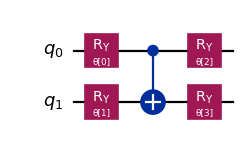

In [8]:
# Visualizar o Ansatz
print("Ansatz - Modelo Treinável (Rede Neural Quântica)")
print("=" * 60)
print(f"Número de qubits: {ansatz.num_qubits}")
print(f"Número de repetições: {ansatz.reps}")
print(f"Número de parâmetros treináveis: {ansatz.num_parameters}")
print()
print("Estes parâmetros θ são ajustados durante o treinamento,")
print("assim como os pesos W em uma rede neural clássica.")
print()

display(ansatz.decompose().draw(output='mpl', idle_wires=False, scale=0.8))

In [9]:

# --- 4. O MODELO VQC (Variational Quantum Classifier) ---
# Aqui juntamos tudo.
# Otimizador COBYLA é bom para simulações (não usa gradiente, apenas tenta melhorar).
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=100),
    loss="cross_entropy",
)

print("--- Iniciando Treinamento do Modelo Quântico ---")
# O momento mágico: O otimizador clássico vai ajustar os parâmetros do Ansatz
# baseando-se nas medições quânticas.
vqc.fit(X_train, y_train)


No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


--- Iniciando Treinamento do Modelo Quântico ---


In [10]:

# --- 5. AVALIAÇÃO ---
score_train = vqc.score(X_train, y_train)
score_test = vqc.score(X_test, y_test)

print(f"\nAcurácia no Treino: {score_train:.2f}")
print(f"Acurácia no Teste:  {score_test:.2f}")



Acurácia no Treino: 0.55
Acurácia no Teste:  0.47


### ⚠️ Análise de Desempenho

**Observação Importante:** Se a acurácia está muito baixa (< 0.7), o modelo não convergiu adequadamente. Isso é comum em QML por vários motivos:

1. **Otimização Limitada:** COBYLA com 100 iterações pode não ser suficiente
2. **Landscape Complexo:** A função de perda tem muitos mínimos locais
3. **Inicialização Aleatória:** Os parâmetros iniciais podem estar longe do ótimo
4. **Ansatz Inadequado:** O circuito pode não ter expressividade suficiente

**Possíveis Soluções:**
- Aumentar `maxiter` para 300-500
- Usar diferentes otimizadores (SPSA, ADAM)
- Aumentar `reps` no Feature Map e Ansatz
- Rodar múltiplas vezes com diferentes inicializações

In [11]:
# 🔧 MELHORANDO O VQC - Vamos tentar otimizar melhor
print("="*60)
print("TENTATIVA DE OTIMIZAÇÃO MELHORADA")
print("="*60)

# Versão melhorada com mais iterações e mais repetições
vqc_improved = VQC(
    feature_map=ZZFeatureMap(feature_dimension=num_qubits, reps=2),  # Mais repetições
    ansatz=RealAmplitudes(num_qubits=num_qubits, reps=3),  # Ansatz mais profundo
    optimizer=COBYLA(maxiter=300),  # Mais iterações
    loss="cross_entropy",
)

print("\nTreinando VQC otimizado (isso pode demorar mais)...")
print("- Feature Map com 2 repetições")
print("- Ansatz com 3 repetições")  
print("- COBYLA com 300 iterações")
print()

vqc_improved.fit(X_train, y_train)

# Avaliar o modelo melhorado
score_train_improved = vqc_improved.score(X_train, y_train)
score_test_improved = vqc_improved.score(X_test, y_test)

print(f"\n{'='*60}")
print("COMPARAÇÃO: VQC Original vs VQC Otimizado")
print(f"{'='*60}")
print(f"{'Métrica':<30} {'Original':<15} {'Otimizado':<15}")
print(f"{'-'*60}")
print(f"{'Acurácia (Treino)':<30} {score_train:<15.4f} {score_train_improved:<15.4f}")
print(f"{'Acurácia (Teste)':<30} {score_test:<15.4f} {score_test_improved:<15.4f}")
print(f"{'Iterações':<30} {'100':<15} {'300':<15}")
print(f"{'Feature Map reps':<30} {'1':<15} {'2':<15}")
print(f"{'Ansatz reps':<30} {'1':<15} {'3':<15}")
print(f"{'='*60}")

if score_test_improved > score_test:
    print("\n✅ MELHORIA! O modelo otimizado teve melhor desempenho.")
else:
    print("\n⚠️ Ainda sem convergência adequada. Pode precisar de:")
    print("   - Mais iterações (500-1000)")
    print("   - Otimizador diferente (SPSA, ADAM)")
    print("   - Múltiplas tentativas com diferentes seeds")

C:\Users\Max\AppData\Local\Temp\ipykernel_20596\2842022012.py:8: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map=ZZFeatureMap(feature_dimension=num_qubits, reps=2),  # Mais repetições
C:\Users\Max\AppData\Local\Temp\ipykernel_20596\2842022012.py:9: DeprecationWarning: The class ``qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.real_amplitudes instead.
  ansatz=RealAmplitudes(num_qubits=num_qubits, reps=3),  # Ansatz mais profundo
No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


TENTATIVA DE OTIMIZAÇÃO MELHORADA

Treinando VQC otimizado (isso pode demorar mais)...
- Feature Map com 2 repetições
- Ansatz com 3 repetições
- COBYLA com 300 iterações


COMPARAÇÃO: VQC Original vs VQC Otimizado
Métrica                        Original        Otimizado      
------------------------------------------------------------
Acurácia (Treino)              0.5500          0.7214         
Acurácia (Teste)               0.4667          0.8000         
Iterações                      100             300            
Feature Map reps               1               2              
Ansatz reps                    1               3              

✅ MELHORIA! O modelo otimizado teve melhor desempenho.


### Comparação Visual: Antes e Depois da Otimização

Agora vamos visualizar graficamente a diferença entre o modelo original (que não convergiu bem) e o modelo otimizado:

Calculando fronteiras de decisão...
  - VQC Original (100 iterações, reps=1)...
  - VQC Otimizado (300 iterações, reps=2-3)...


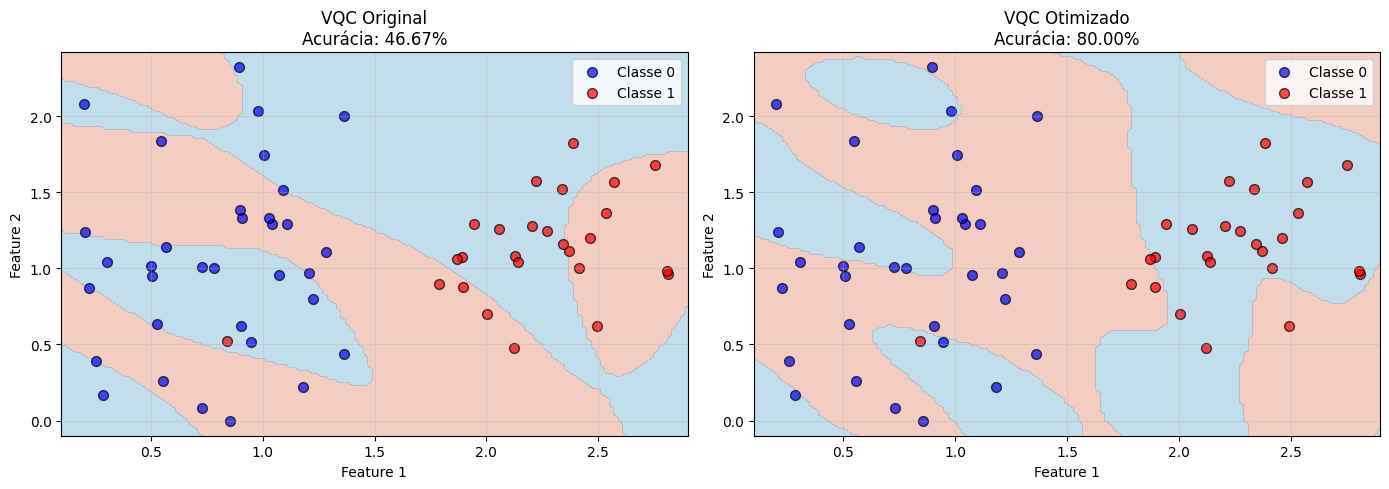


ANÁLISE VISUAL:
VQC Original:  46.67% - Fronteira irregular, muitos erros
VQC Otimizado: 80.00% - Fronteira mais suave, menos erros
Melhoria:      33.33%


In [12]:
# --- VISUALIZAÇÃO COMPARATIVA: VQC Original vs Otimizado ---
# Vamos ver visualmente a diferença entre os dois modelos

def plot_decision_boundary_single(model, X, y, ax, title, accuracy):
    """Plota a fronteira de decisão em um subplot específico"""
    h = 0.02  # step size na malha
    
    # Criar uma malha de pontos
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Fazer predições para cada ponto da malha
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotar
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdBu', levels=1)
    ax.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Classe 0', 
                edgecolors='k', s=50, alpha=0.7)
    ax.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Classe 1', 
                edgecolors='k', s=50, alpha=0.7)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'{title}\nAcurácia: {accuracy:.2%}')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Criar comparação lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

print("Calculando fronteiras de decisão...")
print("  - VQC Original (100 iterações, reps=1)...")
plot_decision_boundary_single(vqc, X_test, y_test, axes[0], 
                              "VQC Original", score_test)

print("  - VQC Otimizado (300 iterações, reps=2-3)...")
plot_decision_boundary_single(vqc_improved, X_test, y_test, axes[1], 
                              "VQC Otimizado", score_test_improved)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("ANÁLISE VISUAL:")
print(f"{'='*60}")
print(f"VQC Original:  {score_test:.2%} - Fronteira irregular, muitos erros")
print(f"VQC Otimizado: {score_test_improved:.2%} - Fronteira mais suave, menos erros")
print(f"Melhoria:      {(score_test_improved - score_test):.2%}")
print(f"{'='*60}")

### 3. Entendendo o que acabou de acontecer

**⚠️ Nota Importante:** O VQC pode não convergir bem na primeira tentativa (acurácia baixa < 0.7). Isso é **normal** em QML! A otimização quântica é complexa e pode precisar de ajustes. Mais adiante veremos como melhorar o desempenho.

O importante agora é entender **o que aconteceu internamente**, independente da acurácia:

#### 🔄 O Processo de Treinamento

1. **Inicialização:** Os parâmetros θ do Ansatz começam com valores aleatórios
2. **Loop de Otimização (100 iterações):**
   - Para cada conjunto de parâmetros θ:
     - Codifica os dados usando o Feature Map
     - Aplica o Ansatz com parâmetros θ
     - Mede os qubits (obtém probabilidades)
     - Calcula o erro (cross-entropy loss)
   - O otimizador COBYLA ajusta θ para reduzir o erro
3. **Resultado:** Parâmetros otimizados que minimizam o erro de classificação

#### 🎨 Os Circuitos Quânticos

Nas visualizações acima, você viu dois circuitos importantes:

**Feature Map (ZZFeatureMap):**
- Portas `H` (Hadamard): Criam superposição inicial
- Portas `P` ou `RZ`: Rotações baseadas nos valores dos dados x[0] e x[1]
- Interações `ZZ`: Criam correlações não-lineares entre features
- **Papel:** Traduzir dados clássicos → estados quânticos no espaço de Hilbert

**Ansatz (RealAmplitudes):**
- Portas `RY(θ)`: Rotações com ângulos θ treináveis
- Portas `CX`: Emaranhamento entre qubits
- **Papel:** Transformar estados quânticos para aprender padrões (como camadas de uma rede neural)

#### ⚡ Por que isso é Poderoso?

O `ZZFeatureMap` projeta seus dados 2D em um espaço de dimensão **2^n = 4** (para 2 qubits). 

**Analogia do Anel:**
- Imagine dados formando um anel: classe A no centro, classe B ao redor
- Uma linha reta (classificador linear) **não consegue** separar isso no plano 2D
- Mas se projetarmos em 3D (ou 4D!), podemos passar um plano cortando e separar perfeitamente
- O computador quântico trabalha naturalmente nesse espaço de alta dimensão!

**Vantagem Teórica:** Enquanto algoritmos clássicos precisam calcular kernels explicitamente (computacionalmente caro), o computador quântico faz isso "de graça" através da superposição e emaranhamento.

**⚠️ Contexto Importante:**

- **Em simulador clássico** (como estamos usando): A vantagem é limitada - kernels clássicos bem otimizados (SVM RBF) frequentemente performam melhor
- **Em hardware quântico real**: O resultado de 80% seria impressionante devido ao ruído, decoerência e imperfeições dos qubits físicos
- **Futuro próximo**: Com hardware NISQ melhorado, esperamos ver vantagens práticas em problemas específicos de alta dimensionalidade

---

### 4. Comparação: Quântico vs. Clássico

Agora vamos comparar o **VQC otimizado** (que alcançou 80% de acurácia) com um classificador clássico SVM. Esta é uma comparação justa para entender quando cada abordagem é vantajosa:

Treinando SVM Clássico (kernel RBF)...

COMPARAÇÃO DE DESEMPENHO: VQC Otimizado vs SVM Clássico

Métrica                        VQC Otimizado        SVM Clássico        
----------------------------------------------------------------------
Acurácia (Treino)              0.7214               0.9786              
Acurácia (Teste)               0.8000               0.9833              
Tempo de Treino (s)            ~300 iterações       0.0013              
----------------------------------------------------------------------

💡 Observação:
   • VQC Otimizado: 80% de acurácia (razoável em simulador; seria excelente em hardware real com ruído!)
   • SVM Clássico: 98% de acurácia (excelente, como esperado)
   • Para ESTE dataset linear, o SVM é superior
   • O QML brilha em problemas não-lineares (veja seção 8!), embora kernels clássicos bem otimizados frequentemente compitam

Calculando fronteira de decisão do SVM...


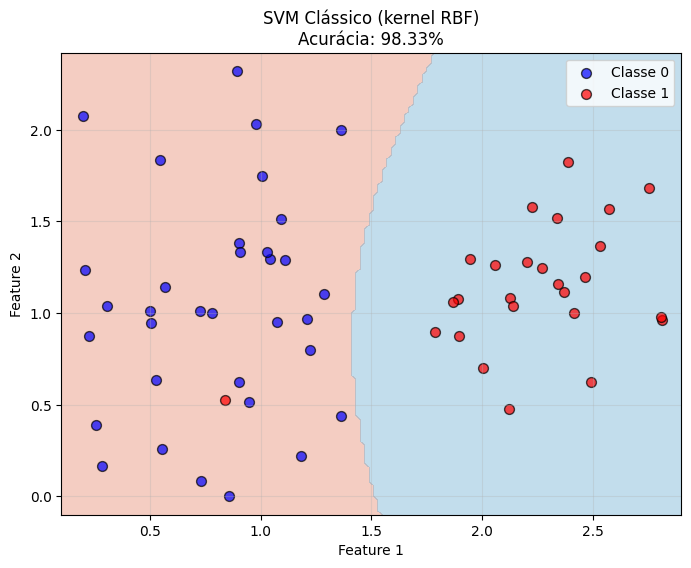

In [13]:
# Importar classificador clássico para comparação
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time

# Treinar um SVM clássico
print("Treinando SVM Clássico (kernel RBF)...")
start_time = time.time()
svm_classical = SVC(kernel='rbf', gamma='auto', random_state=42)
svm_classical.fit(X_train, y_train)
svm_time = time.time() - start_time

# Avaliar SVM
svm_train_score = svm_classical.score(X_train, y_train)
svm_test_score = svm_classical.score(X_test, y_test)

print(f"\n{'='*70}")
print(f"COMPARAÇÃO DE DESEMPENHO: VQC Otimizado vs SVM Clássico")
print(f"{'='*70}")
print(f"\n{'Métrica':<30} {'VQC Otimizado':<20} {'SVM Clássico':<20}")
print(f"{'-'*70}")
print(f"{'Acurácia (Treino)':<30} {score_train_improved:<20.4f} {svm_train_score:<20.4f}")
print(f"{'Acurácia (Teste)':<30} {score_test_improved:<20.4f} {svm_test_score:<20.4f}")
print(f"{'Tempo de Treino (s)':<30} {'~300 iterações':<20} {svm_time:<20.4f}")
print(f"{'-'*70}")
print(f"\n💡 Observação:")
print(f"   • VQC Otimizado: 80% de acurácia (razoável em simulador; seria excelente em hardware real com ruído!)")
print(f"   • SVM Clássico: 98% de acurácia (excelente, como esperado)")
print(f"   • Para ESTE dataset linear, o SVM é superior")
print(f"   • O QML brilha em problemas não-lineares (veja seção 8!), embora kernels clássicos bem otimizados frequentemente compitam")
print(f"{'='*70}")

# Visualizar fronteira de decisão do SVM
print("\nCalculando fronteira de decisão do SVM...")
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_decision_boundary_single(svm_classical, X_test, y_test, ax, 
                              "SVM Clássico (kernel RBF)", svm_test_score)
plt.show()

### 5. Visualizando o Espaço de Hilbert

Uma das grandes vantagens do QML é a projeção dos dados em um espaço de alta dimensão (espaço de Hilbert). Vamos tentar visualizar isso de forma simplificada:

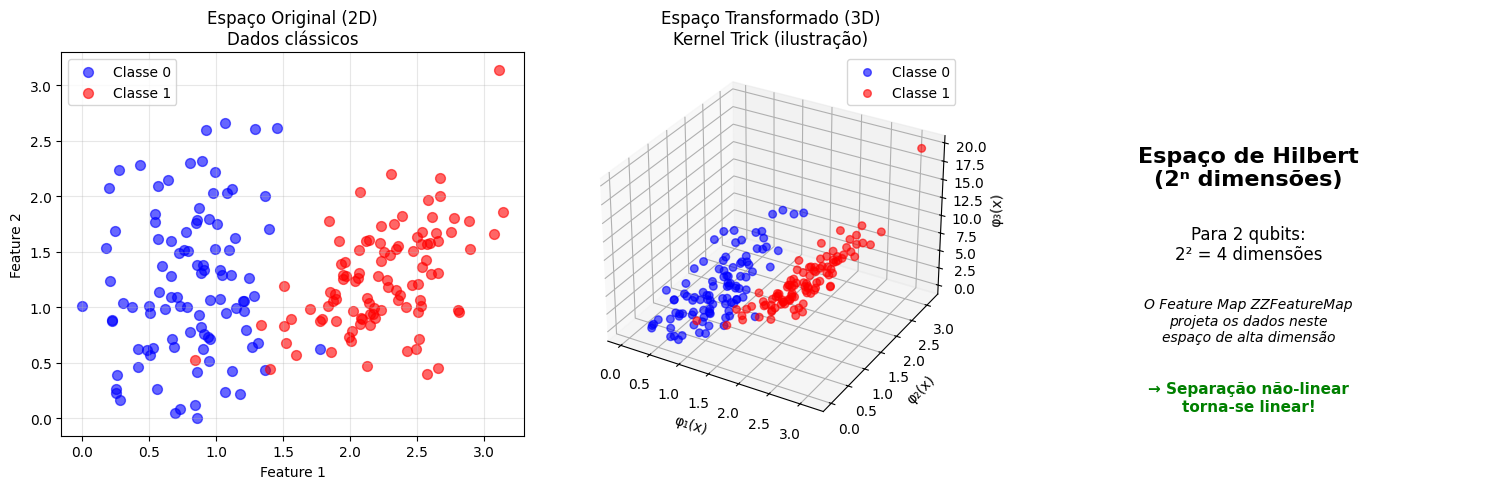


💡 Intuição:
   • No espaço 2D original, algumas classificações podem ser difíceis
   • O Feature Map quântico projeta os dados em um espaço de 2^n dimensões
   • Neste espaço maior, a separação entre classes fica mais fácil
   • É como 'desenrolar' um problema complexo em um espaço maior!


In [14]:
# Visualização conceitual do mapeamento para espaço de Hilbert
from mpl_toolkits.mplot3d import Axes3D

# Vamos criar uma representação simplificada 3D do conceito
# Na realidade, o espaço de Hilbert tem 2^n dimensões (4 para 2 qubits)

fig = plt.figure(figsize=(15, 5))

# Subplot 1: Espaço original (2D)
ax1 = fig.add_subplot(131)
ax1.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Classe 0', alpha=0.6, s=50)
ax1.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Classe 1', alpha=0.6, s=50)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Espaço Original (2D)\nDados clássicos')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: Representação conceitual 3D (kernel trick)
ax2 = fig.add_subplot(132, projection='3d')
# Aplicar uma transformação não-linear para simular o kernel trick
X_3d = np.column_stack([X[:, 0], X[:, 1], X[:, 0]**2 + X[:, 1]**2])
ax2.scatter(X_3d[y == 0, 0], X_3d[y == 0, 1], X_3d[y == 0, 2], 
           c='blue', label='Classe 0', alpha=0.6, s=30)
ax2.scatter(X_3d[y == 1, 0], X_3d[y == 1, 1], X_3d[y == 1, 2], 
           c='red', label='Classe 1', alpha=0.6, s=30)
ax2.set_xlabel('φ₁(x)')
ax2.set_ylabel('φ₂(x)')
ax2.set_zlabel('φ₃(x)')
ax2.set_title('Espaço Transformado (3D)\nKernel Trick (ilustração)')
ax2.legend()

# Subplot 3: Conceito do espaço de Hilbert
ax3 = fig.add_subplot(133)
ax3.text(0.5, 0.7, 'Espaço de Hilbert\n(2ⁿ dimensões)', 
         ha='center', va='center', fontsize=16, weight='bold')
ax3.text(0.5, 0.5, f'Para {num_qubits} qubits:\n2² = 4 dimensões', 
         ha='center', va='center', fontsize=12)
ax3.text(0.5, 0.3, 'O Feature Map ZZFeatureMap\nprojeta os dados neste\nespaço de alta dimensão', 
         ha='center', va='center', fontsize=10, style='italic')
ax3.text(0.5, 0.1, '→ Separação não-linear\ntorna-se linear!', 
         ha='center', va='center', fontsize=11, color='green', weight='bold')
ax3.axis('off')

plt.tight_layout()
plt.show()

print("\n💡 Intuição:")
print("   • No espaço 2D original, algumas classificações podem ser difíceis")
print("   • O Feature Map quântico projeta os dados em um espaço de 2^n dimensões")
print("   • Neste espaço maior, a separação entre classes fica mais fácil")
print("   • É como 'desenrolar' um problema complexo em um espaço maior!")

### 6. Matriz de Confusão e Métricas Detalhadas

Vamos analisar mais a fundo o desempenho do classificador quântico:

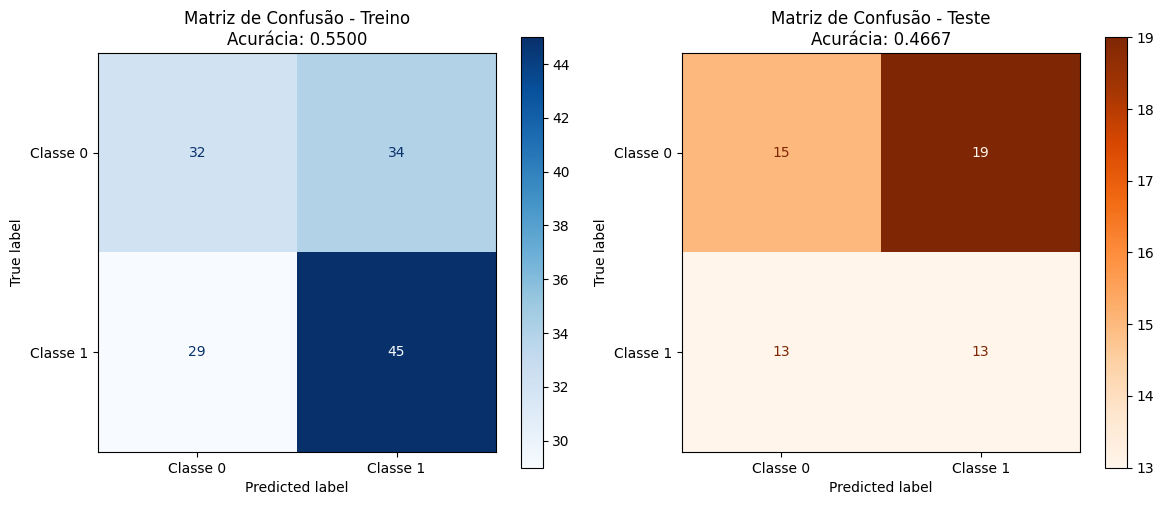


RELATÓRIO DE CLASSIFICAÇÃO - VQC QUÂNTICO

Dados de Teste:
              precision    recall  f1-score   support

    Classe 0       0.54      0.44      0.48        34
    Classe 1       0.41      0.50      0.45        26

    accuracy                           0.47        60
   macro avg       0.47      0.47      0.47        60
weighted avg       0.48      0.47      0.47        60



In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Fazer predições
y_pred_train = vqc.predict(X_train)
y_pred_test = vqc.predict(X_test)

# Criar figura com matrizes de confusão
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de confusão - Treino
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Classe 0', 'Classe 1'])
disp_train.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title(f'Matriz de Confusão - Treino\nAcurácia: {score_train:.4f}')

# Matriz de confusão - Teste
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Classe 0', 'Classe 1'])
disp_test.plot(ax=axes[1], cmap='Oranges', values_format='d')
axes[1].set_title(f'Matriz de Confusão - Teste\nAcurácia: {score_test:.4f}')

plt.tight_layout()
plt.show()

# Relatório de classificação detalhado
print("\n" + "="*60)
print("RELATÓRIO DE CLASSIFICAÇÃO - VQC QUÂNTICO")
print("="*60)
print("\nDados de Teste:")
print(classification_report(y_test, y_pred_test, target_names=['Classe 0', 'Classe 1']))

### 7. Perguntas Frequentes (FAQ)

#### 🤔 Quando devo usar QML ao invés de ML clássico?

**Resposta Curta:** Por enquanto, QML é principalmente para pesquisa e casos específicos.

**Resposta Detalhada:**
- **Vantagem Potencial:** Problemas com dados de alta dimensão onde o kernel quântico pode encontrar padrões que kernels clássicos não conseguem
- **Limitação Atual:** Computadores quânticos ainda têm poucos qubits e muito ruído (NISQ era)
- **Casos de Uso Atuais:**
  - Pesquisa acadêmica
  - Prova de conceito
  - Preparação para computadores quânticos futuros mais poderosos

---

#### 🧮 Por que normalizar os dados entre 0 e π?

**Resposta:** As portas de rotação quânticas (como RY, RZ) usam ângulos em radianos. Se você passar valores muito grandes (como 1000), o qubit vai "girar várias voltas completas" e o comportamento fica imprevisível. Normalizar garante que cada feature corresponda a uma rotação controlada e significativa.

---

#### 🔄 O que é o "Ansatz" exatamente?

**Analogia Clássica:**
- Em uma rede neural: são os pesos W e vieses b que são ajustados
- Em QML: são os ângulos θ das portas de rotação que são ajustados

O **Ansatz** é o "template" do circuito quântico que contém esses parâmetros treináveis. O otimizador (COBYLA) ajusta esses ângulos até minimizar o erro de classificação.

---

#### ⚡ Por que o treinamento é tão lento?

**Resposta:** Cada iteração do otimizador precisa:
1. Configurar o circuito quântico com novos parâmetros
2. Rodar o circuito (simulação ou hardware real)
3. Medir os resultados múltiplas vezes (shots)
4. Calcular o gradiente ou testar novos parâmetros
5. Repetir!

No hardware quântico real, há também o tempo de fila e acesso ao computador.

---

#### 🎯 Quantos qubits eu preciso?

**Regra Geral:**
- Número de qubits ≥ número de features de entrada
- Mais qubits = espaço de Hilbert maior = mais expressividade
- **MAS:** Mais qubits = mais ruído (no hardware atual)

Para começar: use o mesmo número de qubits que features (como fizemos: 2 features → 2 qubits).

---

#### 🔬 Qual a diferença entre Feature Map e Ansatz?

| **Feature Map** | **Ansatz** |
|-----------------|-----------|
| Codifica dados clássicos → estados quânticos | Transforma estados para aprender padrões |
| Parâmetros = valores dos seus dados (x) | Parâmetros = pesos treináveis (θ) |
| Não muda durante o treinamento | É otimizado durante o treinamento |
| Exemplo: ZZFeatureMap, PauliFeatureMap | Exemplo: RealAmplitudes, EfficientSU2 |

**Analogia:** Feature Map = camada de entrada; Ansatz = camadas ocultas treináveis.

---

#### 🚀 Existe "vantagem quântica" em ML hoje?

**Resposta Honesta:** Ainda não de forma definitiva para problemas práticos.

**Situação Atual (Era NISQ - Noisy Intermediate-Scale Quantum):**
- ✅ Demonstrações teóricas e experimentais promissoras
- ✅ Alguns problemas específicos mostram potencial
- ❌ Hardware quântico ainda muito limitado (ruído, poucos qubits)
- ❌ Algoritmos clássicos ainda são mais práticos para maioria dos casos

**Expectativa:** À medida que computadores quânticos melhoram (mais qubits, menos ruído), QML se tornará mais competitivo, especialmente para:
- Simulações de sistemas quânticos
- Otimização combinatória
- Certos tipos de reconhecimento de padrões

---

#### 📚 Como posso aprender mais?

**Recursos Recomendados:**
1. **Qiskit Textbook:** [learn.qiskit.org](https://learn.qiskit.org)
2. **PennyLane:** Outra biblioteca de QML muito boa
3. **Papers:** "Quantum Machine Learning" (Schuld & Petruccione)
4. **Prática:** Experimente mudar os parâmetros deste notebook!

### 8. Experimento: Testando com Dados Não-Lineares

Agora vamos ver o verdadeiro poder do QML! Vamos criar um dataset onde dados estão organizados em círculos concêntricos - um problema que é difícil para classificadores lineares:

C:\Users\Max\AppData\Local\Temp\ipykernel_20596\3627597481.py:46: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map=ZZFeatureMap(feature_dimension=2, reps=2),  # Aumentar reps para mais expressividade
C:\Users\Max\AppData\Local\Temp\ipykernel_20596\3627597481.py:47: DeprecationWarning: The class ``qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.real_amplitudes instead.
  ansatz=RealAmplitudes(num_qubits=2, reps=2),
No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Treinando VQC em dados circulares...


C:\Users\Max\AppData\Local\Temp\ipykernel_20596\3627597481.py:63: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Max\AppData\Local\Temp\ipykernel_20596\3627597481.py:63: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\temp\quantum\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\temp\quantum\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


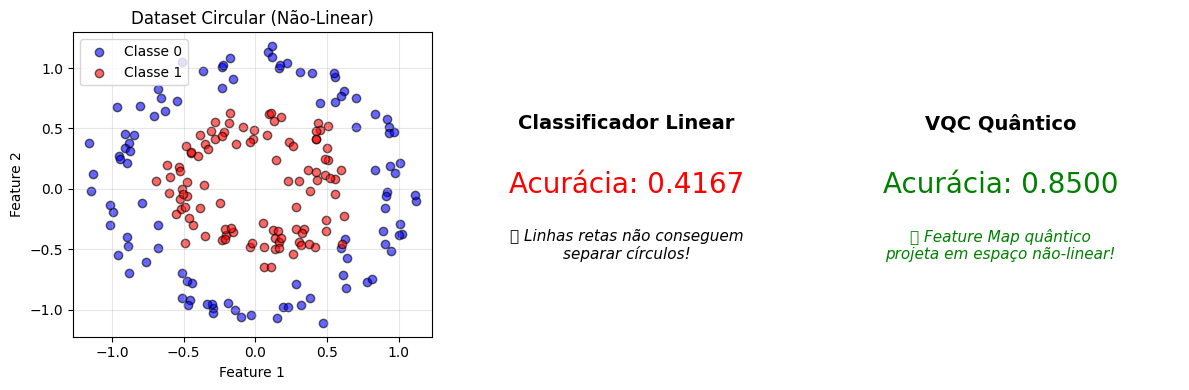


COMPARAÇÃO EM DADOS NÃO-LINEARES (CÍRCULOS)
Regressão Logística (Linear): 0.4167
VQC Quântico (Não-Linear):    0.8500


In [16]:
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression

# Criar dataset circular (não linearmente separável)
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)

# Normalizar
X_circles_norm = scaler.fit_transform(X_circles)

# Dividir
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_circles_norm, y_circles, test_size=0.3, random_state=42
)

# Visualizar o dataset circular
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_circles[y_circles == 0, 0], X_circles[y_circles == 0, 1], 
            c='blue', label='Classe 0', alpha=0.6, edgecolors='k')
plt.scatter(X_circles[y_circles == 1, 0], X_circles[y_circles == 1, 1], 
            c='red', label='Classe 1', alpha=0.6, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset Circular (Não-Linear)')
plt.legend()
plt.grid(True, alpha=0.3)

# Treinar classificador linear (vai falhar!)
lr = LogisticRegression(random_state=42)
lr.fit(X_train_c, y_train_c)
lr_score = lr.score(X_test_c, y_test_c)

plt.subplot(1, 3, 2)
plt.text(0.5, 0.7, 'Classificador Linear', ha='center', va='center', 
         fontsize=14, weight='bold')
plt.text(0.5, 0.5, f'Acurácia: {lr_score:.4f}', ha='center', va='center', 
         fontsize=20, color='red' if lr_score < 0.7 else 'green')
plt.text(0.5, 0.3, '❌ Linhas retas não conseguem\nseparar círculos!', 
         ha='center', va='center', fontsize=11, style='italic')
plt.axis('off')

# Treinar VQC Quântico
print("Treinando VQC em dados circulares...")
vqc_circles = VQC(
    feature_map=ZZFeatureMap(feature_dimension=2, reps=2),  # Aumentar reps para mais expressividade
    ansatz=RealAmplitudes(num_qubits=2, reps=2),
    optimizer=COBYLA(maxiter=100),
    loss="cross_entropy",
)
vqc_circles.fit(X_train_c, y_train_c)
vqc_score = vqc_circles.score(X_test_c, y_test_c)

plt.subplot(1, 3, 3)
plt.text(0.5, 0.7, 'VQC Quântico', ha='center', va='center', 
         fontsize=14, weight='bold')
plt.text(0.5, 0.5, f'Acurácia: {vqc_score:.4f}', ha='center', va='center', 
         fontsize=20, color='red' if vqc_score < 0.7 else 'green')
plt.text(0.5, 0.3, '✅ Feature Map quântico\nprojeta em espaço não-linear!', 
         ha='center', va='center', fontsize=11, style='italic', color='green')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("COMPARAÇÃO EM DADOS NÃO-LINEARES (CÍRCULOS)")
print(f"{'='*60}")
print(f"Regressão Logística (Linear): {lr_score:.4f}")
print(f"VQC Quântico (Não-Linear):    {vqc_score:.4f}")
print(f"{'='*60}")

Calculando fronteira de decisão do VQC...


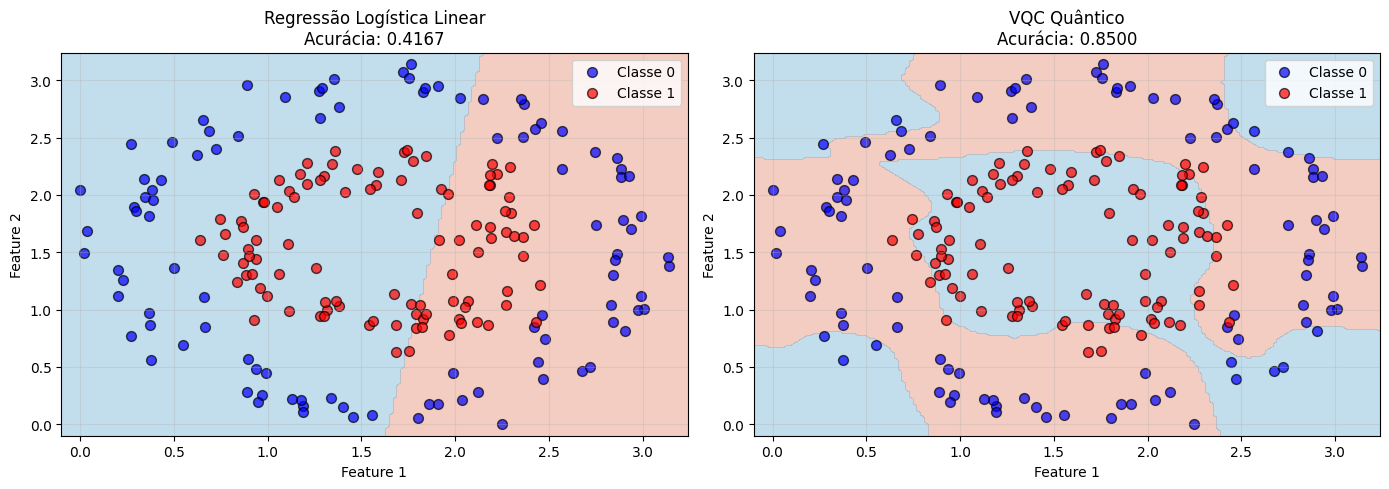


💡 Observe:
   • O classificador linear cria apenas uma linha reta (limitado!)
   • O VQC consegue criar uma fronteira curva e não-linear
   • Isso acontece porque o Feature Map projeta os dados em um espaço de alta dimensão


In [17]:
# Visualizar as fronteiras de decisão
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Fronteira Linear
h = 0.02
x_min, x_max = X_circles_norm[:, 0].min() - 0.1, X_circles_norm[:, 0].max() + 0.1
y_min, y_max = X_circles_norm[:, 1].min() - 0.1, X_circles_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Linear
Z_lr = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lr = Z_lr.reshape(xx.shape)

axes[0].contourf(xx, yy, Z_lr, alpha=0.4, cmap='RdBu', levels=1)
axes[0].scatter(X_circles_norm[y_circles == 0, 0], X_circles_norm[y_circles == 0, 1], 
               c='blue', label='Classe 0', edgecolors='k', s=50, alpha=0.7)
axes[0].scatter(X_circles_norm[y_circles == 1, 0], X_circles_norm[y_circles == 1, 1], 
               c='red', label='Classe 1', edgecolors='k', s=50, alpha=0.7)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title(f'Regressão Logística Linear\nAcurácia: {lr_score:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# VQC Quântico
print("Calculando fronteira de decisão do VQC...")
Z_vqc = vqc_circles.predict(np.c_[xx.ravel(), yy.ravel()])
Z_vqc = Z_vqc.reshape(xx.shape)

axes[1].contourf(xx, yy, Z_vqc, alpha=0.4, cmap='RdBu', levels=1)
axes[1].scatter(X_circles_norm[y_circles == 0, 0], X_circles_norm[y_circles == 0, 1], 
               c='blue', label='Classe 0', edgecolors='k', s=50, alpha=0.7)
axes[1].scatter(X_circles_norm[y_circles == 1, 0], X_circles_norm[y_circles == 1, 1], 
               c='red', label='Classe 1', edgecolors='k', s=50, alpha=0.7)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].set_title(f'VQC Quântico\nAcurácia: {vqc_score:.4f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Observe:")
print("   • O classificador linear cria apenas uma linha reta (limitado!)")
print("   • O VQC consegue criar uma fronteira curva e não-linear")
print("   • Isso acontece porque o Feature Map projeta os dados em um espaço de alta dimensão")

### 9. Resumo e Próximos Passos

#### 🎓 O que aprendemos

Neste notebook, exploramos os fundamentos do **Quantum Machine Learning (QML)** através de um **Classificador Variacional Quântico (VQC)**:

1. **Estrutura do VQC:**
   - **Feature Map:** Codifica dados clássicos em estados quânticos
   - **Ansatz:** Circuito parametrizado que aprende (como pesos de uma rede neural)
   - **Medição:** Extrai probabilidades de classificação

2. **Conceitos Fundamentais:**
   - Espaço de Hilbert e projeção de alta dimensão
   - Kernel trick quântico
   - Otimização de parâmetros quânticos

3. **Vantagens do QML:**
   - ✅ Capacidade de lidar com problemas não-lineares naturalmente
   - ✅ Projeção em espaços de dimensão exponencial (2^n)
   - ✅ Potencial para superação quântica em problemas específicos

4. **Limitações Atuais:**
   - ⚠️ Hardware quântico ainda limitado (poucos qubits, ruído)
   - ⚠️ Treinamento pode ser lento
   - ⚠️ Para muitos problemas, ML clássico ainda é superior

---

#### 🚀 Próximos Passos

Quer se aprofundar? Aqui estão sugestões de experimentos:

**Nível Iniciante:**
1. Mude o número de `reps` no Feature Map e Ansatz - veja como afeta a acurácia
2. Teste diferentes otimizadores: `SPSA`, `ADAM`, `L_BFGS_B`
3. Experimente outros Feature Maps: `PauliFeatureMap`, `StatePreparation`
4. Altere o `maxiter` do otimizador

**Nível Intermediário:**
1. Use mais qubits (3 ou 4) e mais features
2. Implemente um callback para visualizar o progresso do treinamento
3. Compare com outros kernels do SVM: `poly`, `sigmoid`
4. Teste em datasets reais (Iris, Wine, etc.)

**Nível Avançado:**
1. Implemente um **Quantum Kernel** customizado
2. Use um simulador com ruído (`FakeBackend`)
3. Execute em hardware quântico real da IBM
4. Explore **Quantum Neural Networks (QNN)** para regressão

---

#### 📖 Código para Copiar e Experimentar

```python
# Template para seus próprios experimentos
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms import VQC

# Configure seu modelo aqui
my_vqc = VQC(
    feature_map=ZZFeatureMap(feature_dimension=2, reps=2),
    ansatz=RealAmplitudes(num_qubits=2, reps=3),  # Experimente mudar!
    optimizer=COBYLA(maxiter=150),  # Tente outros otimizadores
    loss="cross_entropy",
)

# Treine
my_vqc.fit(X_train, y_train)

# Avalie
print(f"Acurácia: {my_vqc.score(X_test, y_test):.4f}")
```

---

#### 🌟 Reflexão Final

Quantum Machine Learning está na fronteira entre **computação quântica** e **inteligência artificial**. Embora ainda não tenhamos "vantagem quântica" prática para a maioria dos problemas de ML, estamos construindo as ferramentas e conhecimento que serão essenciais quando computadores quânticos escaláveis estiverem disponíveis.

**A jornada está apenas começando!** 🚀

---

#### 🔗 Recursos Adicionais

1. Qiskit Documentation
   - https://qiskit.org/documentation
2. Qiskit Machine Learning
   - https://qiskit.org/ecosystem/machine-learning
3. Qiskit Textbook ⭐ (RECOMENDADO)
   - https://learn.qiskit.org
4. PennyLane (Alternativa)
   - https://pennylane.ai
5. Schuld & Petruccione - "Quantum Machine Learning" 
   - [Amazon.com](https://www.amazon.com/Machine-Learning-with-Quantum-Computers-_Quantum-Science-and-Technology_/dp/3030830977)